# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
**Data analysis**

In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    RocCurveDisplay,
)

from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample, shuffle


plt.style.use('ggplot')

In [381]:
try:
    df = pd.read_csv(r'D:\Data Science\Projects\fitness_class_2212.csv')
except:
    df = pd.read_csv('https://s3.amazonaws.com/talent-assets.datacamp.com/fitness_class_2212.csv')

In [382]:
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [383]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [385]:
df['days_before'] = df['days_before'].str.replace('days', '')
set(df['days_before'])
df.astype({'days_before': 'int32'}).dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before           int32
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [386]:
df['day_of_week'].unique()

array(['Wed', 'Mon', 'Sun', 'Fri', 'Thu', 'Wednesday', 'Fri.', 'Tue',
       'Sat', 'Monday'], dtype=object)

In [387]:
#replacing strings to one type, since we have days like 'Fri.' or 'Monday'.
df['day_of_week'] = df['day_of_week'].str.replace('Fri.', 'Fri', regex=True)
df['day_of_week'] = df['day_of_week'].str.replace('Wednesday', 'Wed', regex=True)
df['day_of_week'] = df['day_of_week'].str.replace('Monday', 'Mon', regex=True)

In [388]:
df['category'].unique()

array(['Strength', 'HIIT', 'Cycling', 'Yoga', '-', 'Aqua'], dtype=object)

In [389]:
# changing '_' to unknown
df['category'] = df['category'].str.replace('-', 'Unknown')

**Working with outliers**

<AxesSubplot: >

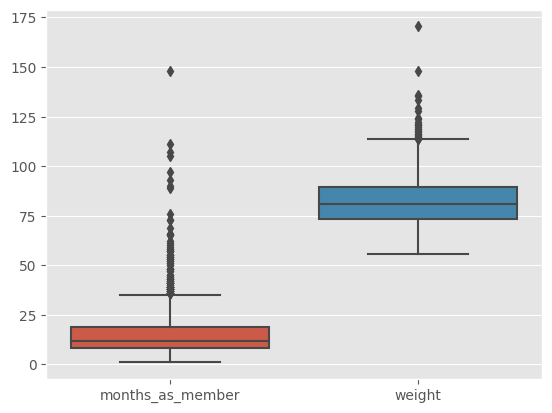

In [390]:
sns.boxplot(df[['months_as_member', 'weight']])

In columns months as a member and weight we have outliers. In order to get accurate result in our future model we need to get rid of ouliers like weight of 170.

In [391]:
# Finding quantile and removing outliers
print(df.shape)
q1 = df['weight'].quantile(0.25)
q3 = df['weight'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df = df.loc[(df['weight'] > fence_low) & (df['weight'] < fence_high)]
print(df.shape)

(1500, 8)
(1454, 8)


In [392]:
# Finding quantile and removing outliers plus checking how many rows we filtred out
print(df.shape)
q1 = df['months_as_member'].quantile(0.25)
q3 = df['months_as_member'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df = df.loc[(df['months_as_member'] > fence_low) & (df['months_as_member'] < fence_high)]
print(df.shape)

(1454, 8)
(1365, 8)


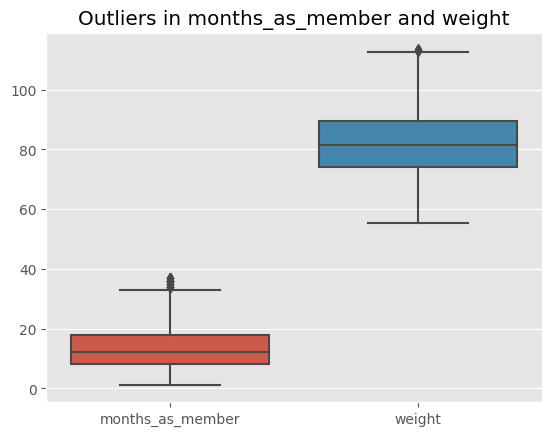

In [393]:
sns.boxplot(df[['months_as_member', 'weight']])
plt.title('Outliers in months_as_member and weight')
plt.show()


In [394]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1365.000000,1365.000000,1365.000000,1365.000000
mean,750.205861,13.386813,82.626403,0.271795
std,434.700801,7.542536,11.310111,0.445048
min,1.000000,1.000000,55.410000,0.000000
25%,372.000000,8.000000,74.090000,0.000000
50%,756.000000,12.000000,81.360000,0.000000
75%,1128.000000,18.000000,89.550000,1.000000
max,1500.000000,37.000000,113.450000,1.000000


In [395]:
df.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [396]:
df_filtred = df[df['weight'].notna()]
print('Percent of good values is :', round(df_filtred["weight"].shape[0] / df["weight"].shape[0]  * 100, 2))

Percent of good values is : 100.0


Because we miss only 1.35 % values in weight, we can fill them  with mean for better model performance

In [397]:
# filling missing NA
df['weight'] = df['weight'].fillna(df['weight'].mean())
df.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [398]:
#checking for duplicates
df.duplicated().sum()

0

## Answers

For every column in the data:

a. All values match the description given in the table. Except weight column, it has missing data and min value is 55 not 40 as it was described. Also maximum is 170 kg which i filtred out as outlier.

b. We are missing 20 rows in weight column. In overall it is 1.4 % of all data. Therefore i used mean to fill missing values. 

c. I deleted str 'days' from column days_before and set type as integer.

  Also, changed values in day_of_week column to same format like 'Mon'-'Sun'.
  In column 'category' replaced '-' to 'Unknown'
  
 And in later steps ill convert all the categorical variables into numeric variables

## Task 2
**Visualization that shows how many bookings attended the class.**

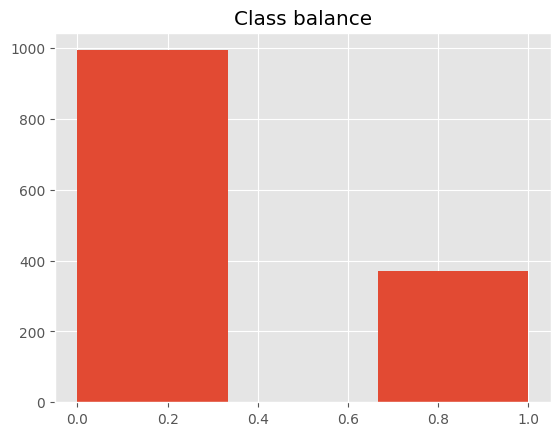

0    0.728205
1    0.271795
Name: attended, dtype: float64


In [399]:
df['attended'].hist(bins=3)
plt.title('Class balance')

plt.show()

print(df['attended'].value_counts(normalize = 1))

**Answer:**
a. Not attended has the most observations


b. Classes are imbalanced. For better perfomace of a model we can use stratify on the attended column while splitting data on train and test.

With Logistic Regression i can use class_weight='balanced'.

Also upsampling and downsampling will work.


## Task 3
**Distribution of the number of months as a member**

In [400]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n
    return x, y

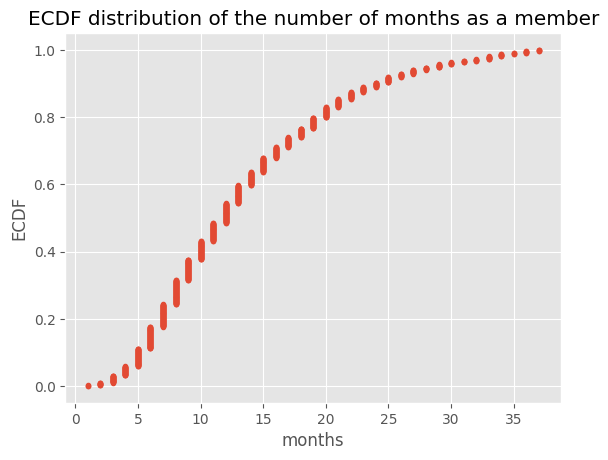

In [401]:
x_month, y_month = ecdf(df['months_as_member']) 
plt.plot(x_month, y_month, marker='.', linestyle='none') 
plt.xlabel('months')
plt.ylabel('ECDF')
plt.title('ECDF distribution of the number of months as a member')
plt.show()

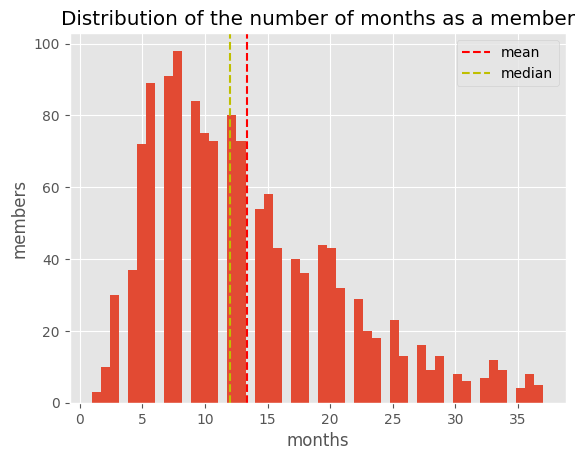

Mean number of months is 13.386813186813187 and median is 12.0


In [402]:
ax = df['months_as_member'].hist(bins=50)
ax.axvline(x = df['months_as_member'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = df['months_as_member'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.xlabel('months')
plt.ylabel('members')
plt.title('Distribution of the number of months as a member')
plt.show()


print('Mean number of months is {} and median is {}'.format(df['months_as_member'].mean(), df['months_as_member'].median()))

	
We can see an exponential distribution on the histogram because have number of months until client stop attending gym.

## Task 4
**The relationship between attendance and number of months as a member**


In [403]:
# checking correlation
df.corr()

,booking_id,months_as_member,weight,attended
booking_id,1.000000,0.018462,-0.015506,0.023429
months_as_member,0.018462,1.000000,-0.498163,0.454607
weight,-0.015506,-0.498163,1.000000,-0.223839
attended,0.023429,0.454607,-0.223839,1.000000


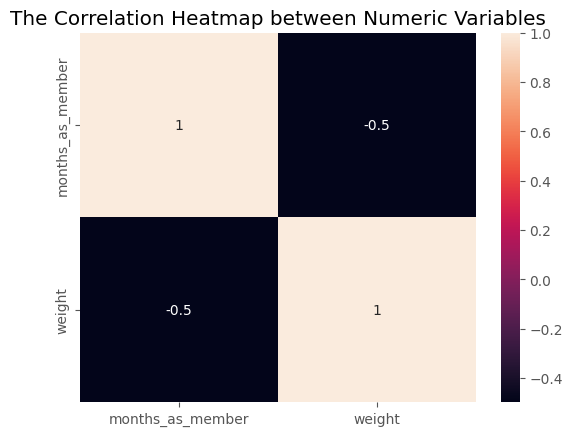

In [404]:
# A heatmap of numeric variables
numeric = df[['months_as_member','weight']]
sns.heatmap(numeric.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables');

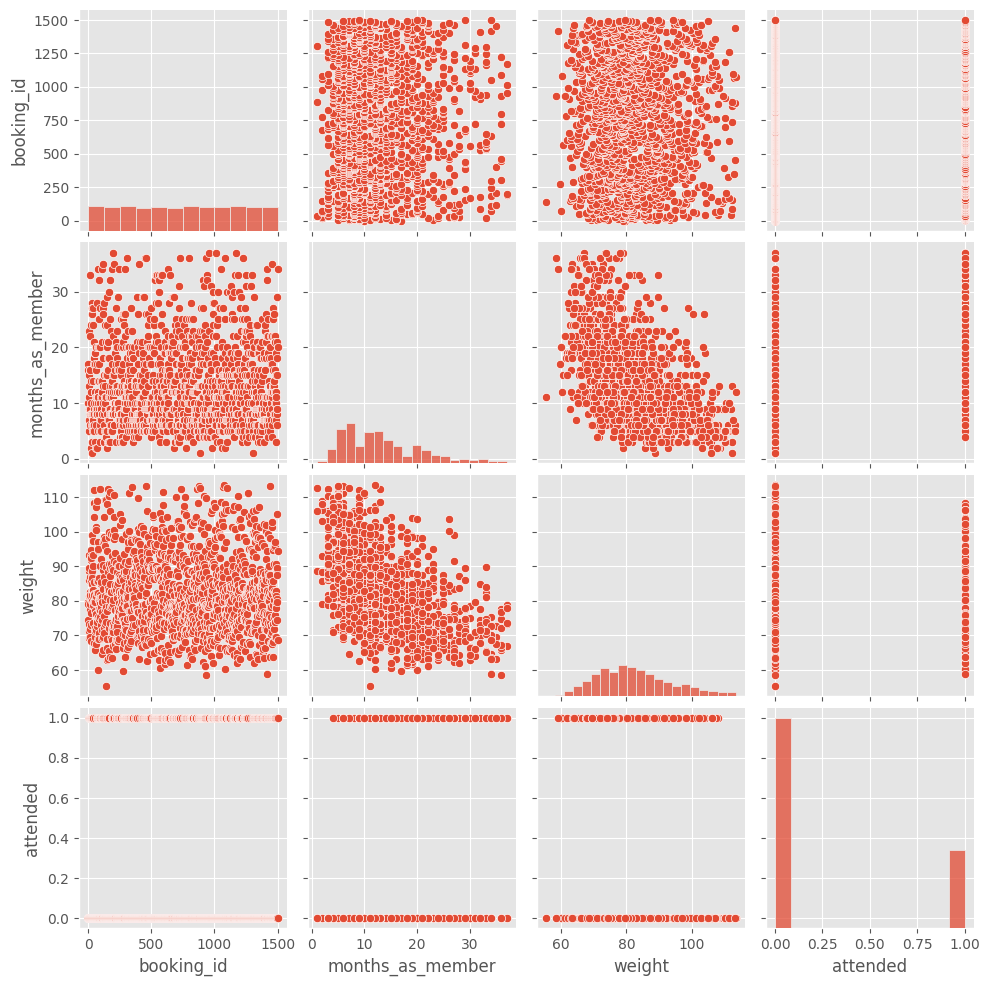

In [405]:
# visualization of features
sns.pairplot(df)
plt.show()

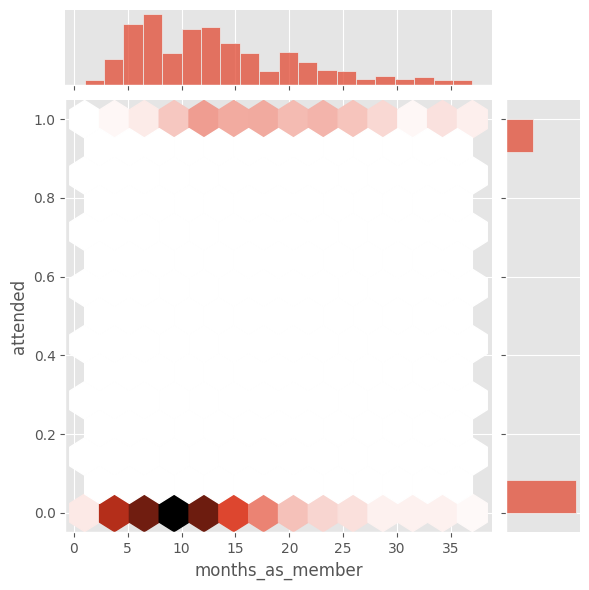

In [406]:
sns.jointplot(data=df, x='months_as_member', y='attended', kind='hex')
plt.show()

**The relationship between attendance and number of months as a member**

I decided to make jointplot to further investigate the relationship between weight and our target varible - attended. We can see that there no relationship between them.

We can see that variables have a low correlation 0.4855262233. We can now conclude that class attendance is not associated with months as a member.

## Task 5
*The business wants to predict whether members will attend using the data provided.
State the type of machine learning problem that this is (regression/ classification/
clustering).
*

This is a classification problem so logistic regression would work to predict whether members will attend. I am choosing the Logistic Regression model because we can make our prediction which is binary. The comparison model I am choosing is the Random Forest Classifier model because it is easy to interpret and see features that are important.

For the evaluation, I am choosing **ROC AUC score** to evaluate the model.

## Task 6
**Baseline model to predict whether members will attend**

In [407]:
not_informative = ['booking_id']
df = df.drop(not_informative, axis=1)

In [408]:
# Here i split the data into two DataFrames: X (features) and y (target variable)
X = df.drop('attended', axis=1)  # features
y = df["attended"]  # target variable

# Spliting the data into train and test subsets and using stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=12345, stratify=df['attended']
)

# Using OHE to code category variables and droping first column
features_train = pd.get_dummies(X_train, drop_first=True)
features_test = pd.get_dummies(X_test, drop_first=True)


# Using StandardScaler on numeric data based on features_train
numeric = ['months_as_member', 'weight']
sc = StandardScaler().fit(features_train[numeric])
X_train_scaled = sc.transform(features_train[numeric])
X_test_scaled = sc.transform(features_test[numeric])

In [409]:
# baselane model
clf_b = LogisticRegression()

# Training the classifer 
clf_b = clf_b.fit(X_train_scaled, y_train)

# Predicting the outcomes on the test set
y_pred = clf_b.predict(X_test_scaled)

In [410]:
# Bassline model metrics: accuracy, precision, recall scores, AUC
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(f'ROC-AUC score {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.7748538011695907
Precision: 0.6538461538461539
Recall: 0.3655913978494624
ROC-AUC score 0.6466511206114782


**In this step :**

* I split the data into a training set and a test set

* Normalized the numeric features

* Converted the categorical variables into numeric features

* Build a LogisticRegression model 


## Task 7
**A comparison model to predict whether members will attend**

In [411]:
# A comparison model of Random Forrest

model_rf = RandomForestClassifier(random_state=12345)
model_rf.fit(X_train_scaled, y_train) 
predictions = model_rf.predict(X_test_scaled) 
result = (accuracy_score(y_test, predictions))

            

print("Accuracy of the model:", result)
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print(f'ROC-AUC score {roc_auc_score(y_test, predictions)}')


Accuracy of the model: 0.7602339181286549
Precision: 0.5753424657534246
Recall: 0.45161290322580644
ROC-AUC score 0.6635574556289675


Summary: RandomForestClassifier has better ROC AUC score which is 0.66 and LogisicRegression 0.64.

Next we take RandomForestClassifier and find best hyperparmaters

**Finding hyperparmaters**

In [412]:
# hyper parameters for RF

best_model = None
best_result_rf = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model_rf = RandomForestClassifier(max_depth=depth, n_estimators=est, random_state=12345)
        model_rf.fit(X_train_scaled, y_train) 
        predictions = model_rf.predict(X_test_scaled) 
        result = (accuracy_score(y_test, predictions))
        if result > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result
            best_est = est
            best_depth = depth

print("Accuracy:", best_result_rf, "Best estimators:", best_est, "Best Depth:", best_depth)
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))



Accuracy: 0.7865497076023392 Best estimators: 30 Best Depth: 6
Precision: 0.5797101449275363
Recall: 0.43010752688172044


With hypeparamentrs with have accuracy: 0.7865497076023392 and Best estimators is 30 and best depth is 6.

**Finding Feature importances**

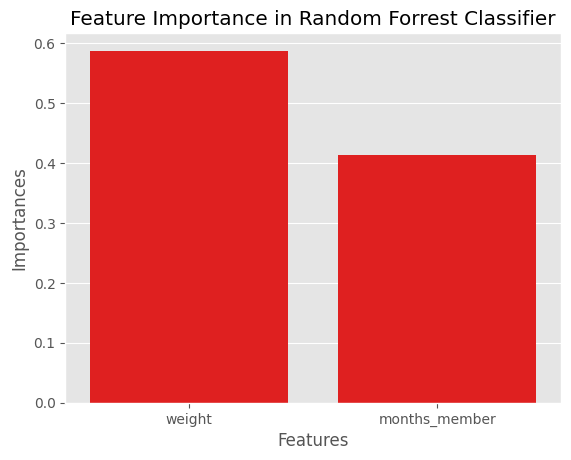

In [413]:
# A dataframe with features
features_df = pd.DataFrame({'Features': ['months_member', 'weight'],
             'Importances': model_rf.feature_importances_}).sort_values('Importances', ascending=False)

# A barplot of feautre importances
sns.barplot(y='Importances',x='Features', 
           data=features_df, color="r")
plt.title('Feature Importance in Random Forrest Classifier')
plt.show()

We can tell that weight influence our model more than months as member.

In [414]:
model_rf = RandomForestClassifier(max_depth=6, n_estimators=30, random_state=12345)
model_rf.fit(X_train_scaled, y_train) 
predictions_test = model_rf.predict(X_test_scaled) 

Text(0.5, 23.52222222222222, 'Predicted label')

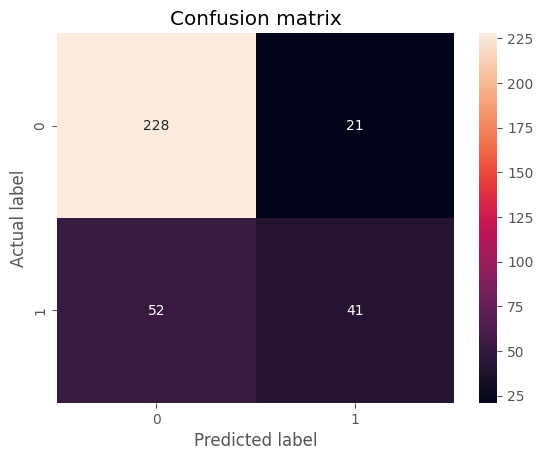

In [415]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_test)

# Vizualization of confusion matrix 
sns.heatmap(cnf_matrix, annot=True, fmt="g")
plt.title("Confusion matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

ROC-AUC score 0.6782614328280866


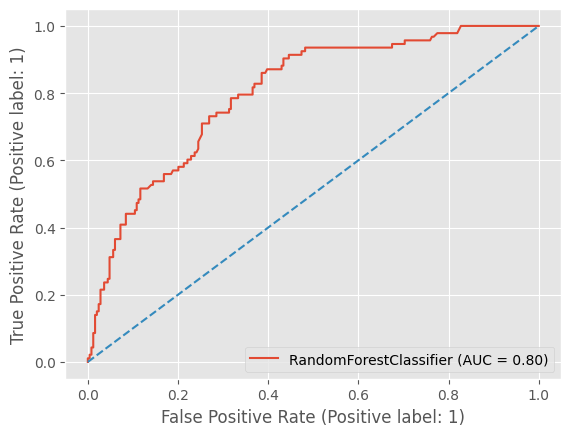

In [416]:
RocCurveDisplay.from_estimator(model_rf, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], linestyle='--')
print(f'ROC-AUC score {roc_auc_score(y_test, predictions_test)}')

## Task 8
* We have a goal to find out will clients attend classes or not. This is binary data(yes 1 or no 0), so  there could only be two possible classes. 

* I am choosing the Logistic Regression model as a baseline model because it is very efficient to train and interpret. 

* The comparison model I am choosing is the Random Forrest model is easier to implement and very efficient to train. And features are uncorrelated.


## Task 9
**The performance of the two models used in parts 6 and 7**

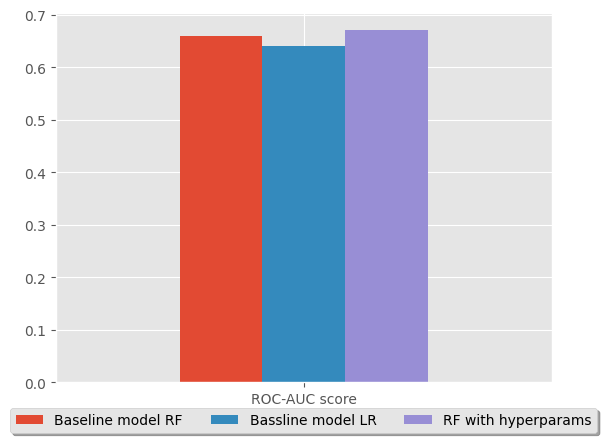

In [417]:
final_results = pd.DataFrame({
              'Baseline model RF': 0.66,\
              'Bassline model LR': 0.64,\
              'RF with hyperparams': 0.67,\
               
             }, index=['ROC-AUC score'])


final_results.plot(kind='bar')
plt.xticks(rotation=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()


## Task 10


On this project i replaced all useless information in columns and set the right data type, for example in column 'days_before'.

Filtered out outliers in weight and months columns.

Also, i did some EDA of data and made some vizualizations.

Also encoded categorical features and did scaling.

**Model performance**

Random Forest model with hypeparameters performs better because we set best depth and number of estimators.

We have result of AUC 0.67 this is better than random guess but still i think we can imporve our result by using upsampling for imbalaced classes and accuracy is not the best metric for classes that were in the model.

Logistic Regression model is 0.64.

* I am choosing the Logistic Regression model as a baseline model because it is very efficient to train and interpret. 

* The comparison model I am choosing is the Random Forrest model is easier to implement and very efficient to train. And features are uncorrelated.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam